In [1]:
import zipfile
import os
import shutil
import random
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import TensorBoard
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [2]:
path = './'

In [27]:
#unzip the zip file state-farm-distracted-driver-detection.zip to its same directory located in ./content/drive/MyDrive/Datamining/

if os.path.exists(path + 'imgs'):
    print("The zip file has already been extracted")
else:
    zip_file = path + 'state-farm-distracted-driver-detection.zip'
    zip_ref = zipfile.ZipFile(zip_file, 'r')
    zip_ref.extractall(path)
    zip_ref.close()

#delete the file driver_imgs_list.csv and sample_submission.csv
if os.path.exists(path + 'driver_imgs_list.csv'):
    os.remove(path + 'driver_imgs_list.csv')
if os.path.exists(path + 'sample_submission.csv'):
    os.remove(path + 'sample_submission.csv')
#delete the folder imgs/test and its images
if os.path.exists(path + 'imgs/test'):
    shutil.rmtree(path + 'imgs/test')

The zip file has already been extracted


In [4]:
#make 2 directories named test and train in the content directory with the same folders that are in the train directory
if os.path.exists(path + 'test'):
    print("The directories have already been created")
else:
    os.makedirs(path + 'test')
    os.makedirs(path + 'train')

    # Obtiene las carpetas dentro de 'train'
    folders = os.listdir(path + 'imgs/train')

    for folder in folders:
        os.makedirs(path + f'test/{folder}')
        os.makedirs(path + f'train/{folder}')

The directories have already been created


In [5]:
#for each c0-c9 folder in the train directory, move 80% of the images to the test directory randomly
#check if the content/imgs/train/c0 folder is empty
folders = os.listdir(path + 'imgs/train')
if len(os.listdir(path + 'imgs/train/c0')) != 0:
    for folder in folders:
        images = os.listdir(path + f'imgs/train/{folder}')
        random.shuffle(images)
        n = int(len(images) * 0.15)
        test_images = images[:n]
        for img in test_images:
            shutil.move(path + f'imgs/train/{folder}/{img}', path + f'test/{folder}/{img}')

    #move the remaining 20% of the images to the train directory
    for folder in folders:
        images = os.listdir(path + f'imgs/train/{folder}')
        random.shuffle(images)
        for img in images:
            shutil.move(path + f'imgs/train/{folder}/{img}', path + f'train/{folder}/{img}')
else:
    print("The images have already been moved")



The images have already been moved


In [6]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
train_generator = train_datagen.flow_from_directory(path + 'train', target_size=(224, 224), batch_size=32, class_mode='categorical', color_mode='rgb')
test_datagen = ImageDataGenerator(rescale=1./255) 
test_generator = test_datagen.flow_from_directory(path + 'test', target_size=(224, 224), batch_size=32, class_mode='categorical', color_mode='rgb')

Found 19066 images belonging to 10 classes.
Found 3358 images belonging to 10 classes.


In [7]:
# Definition of the image sizes
input_size = 224
num_colors = 3

# Definition of the network layers
layers = [
    # First convolution with 16 filters of size 3 x 3 and relu activation function
    keras.layers.Conv2D(16,
                        (3,3),
                        activation='relu',
                        input_shape=(input_size,
                                    input_size,
                                    num_colors)),
    # Pooling of size 2 x 2 and stride 1
    keras.layers.MaxPooling2D(2, 2),
    # Second convolution with 32 filters of size 3 x 3 and relu activation function
    keras.layers.Conv2D(32,
                        (3,3),
                        activation='relu'),
    # Pooling of size 2 x 2 and stride 1
    keras.layers.MaxPooling2D(2,2),
    # Third convolution with 64 filters of size 3 x 3 and relu activation function
    keras.layers.Conv2D(64,
                        (3,3),
                        activation='relu'),
    # Pooling of size 2 x 2 and stride 1
    keras.layers.MaxPooling2D(2,2),
    # Fourth convolution with 64 filters of size 3 x 3 and relu activation function
    keras.layers.Conv2D(64,
                        (3,3),
                        activation='relu'),
    # Pooling of size 2 x 2 and stride 1
    keras.layers.MaxPooling2D(2,2),
    # Flattening to transform the information into a vector
    keras.layers.Flatten(),
    # Dense layer with 512 neurons and relu activation function
    keras.layers.Dense(512,
                       activation='relu'),
    # Output layer with softmax activation function
    keras.layers.Dense(10,
                       activation = tf.nn.softmax),
]

model = keras.Sequential(layers, name="myModel")

c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
# Optimization algorithm and loss function configuration
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Network structure
model.summary()

Model: "myModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,784,746 (18.25 MB)

 Trainable params: 4,784,746 (18.25 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:

# Training process execution
# Iterations: 15
# Number of steps per iteration: 4
history = model.fit(train_generator,
                    steps_per_epoch = 4,
                    epochs = 50)

# Evaluation of the model using the test set
results = model.evaluate(test_generator)

print(results)

Epoch 1/50


c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step - accuracy: 0.0667 - loss: 2.8108
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - accuracy: 0.1052 - loss: 2.3054
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.0906 - loss: 2.2957
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - accuracy: 0.1115 - loss: 2.2964
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - accuracy: 0.1406 - loss: 2.3145
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - accuracy: 0.1865 - loss: 2.2826
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - accuracy: 0.1042 - loss: 2.2826
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - accuracy: 0.1833 - loss: 2.2723
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.1698 - loss: 2.2772
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - accuracy: 0.1583 - loss: 2.2341
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - accuracy: 0.2469 - loss: 2.2015
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - accuracy: 0.2208 - loss: 2.2084


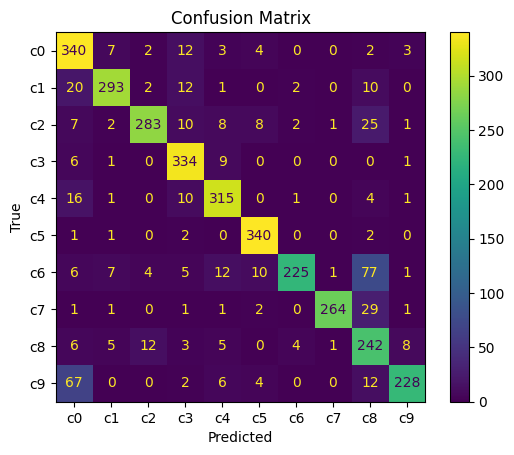

In [24]:
predictions = []
true_labels = []

# Iterate over each batch in the test generator
for i in range(len(test_generator)):
    # Get batch of data and labels and predict on it
    batch_data, batch_labels = test_generator[i]
    batch_predictions = model.predict(batch_data, verbose=0)
    # Append predictions and true labels
    predictions.extend(np.argmax(batch_predictions, axis=1))
    true_labels.extend(np.argmax(batch_labels, axis=1))

cm = confusion_matrix(true_labels, predictions)
labels = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()